In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [2]:
# Utils

def load_binary_image(filename):
    img = cv.imread(filename, cv.IMREAD_GRAYSCALE)             # load as grayscale
    img = cv.normalize(img, None, 0.0, 1.0, cv.NORM_MINMAX)    # binarize
    return img

def show_three_images(im1, im2, im3):
    plt.subplot(1, 3, 1)
    plt.imshow(im1, cmap='gray')
    plt.subplot(1, 3, 2)
    plt.imshow(im2, cmap='gray')
    plt.subplot(1, 3, 3)
    plt.imshow(im3, cmap='gray')
    plt.show()

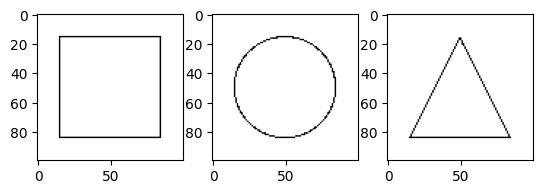

In [3]:
square = load_binary_image("pattern/square.png")
cercle = load_binary_image("pattern/cercle.png")
triangle = load_binary_image("pattern/triangle.png")

show_three_images(square, cercle, triangle)

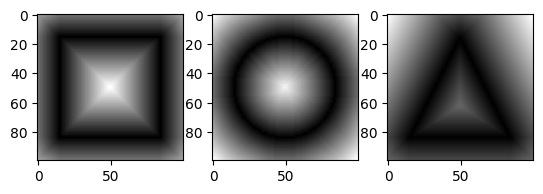

In [4]:
# Produire la transformée en distance de ces 3 images en utilisant le masque de chanfrein de votre choix. 
# Précisez le masque que vous avez choisi.

# On utilise le masque de chamfrein 3x3 de Rosenfeld
# 1 2 3
# 4 0 5
# 6 7 8

# On utilise la fonction cv.distanceTransform avec l'option cv.DIST_L2
# qui correspond à la distance euclidienne
# On utilise l'option cv.DIST_MASK_3 pour le masque de chamfrein 3x3

def distance_transform(im):
    return cv.distanceTransform(im, cv.DIST_L2, cv.DIST_MASK_3)

square_dist = distance_transform(square)
cercle_dist = distance_transform(cercle)
triangle_dist = distance_transform(triangle)

show_three_images(square_dist, cercle_dist, triangle_dist)

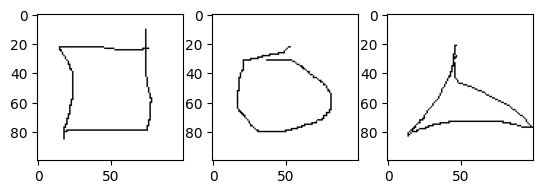

In [5]:
hd_square = load_binary_image("hand-drawn/square-1.png")
hd_circle = load_binary_image("hand-drawn/circle-1.png")
hd_triangle = load_binary_image("hand-drawn/triangle-1.png")

show_three_images(hd_square, hd_circle, hd_triangle)

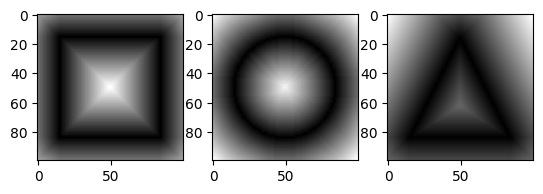

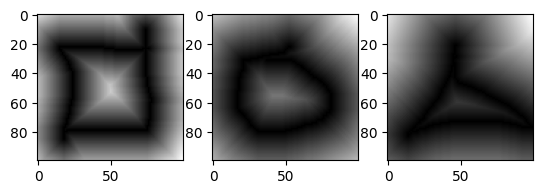

True

In [12]:
hd_square_dist = distance_transform(hd_square)
hd_circle_dist = distance_transform(hd_circle)
hd_triangle_dist = distance_transform(hd_triangle)

show_three_images(square_dist, cercle_dist, triangle_dist)

show_three_images(hd_square_dist, hd_circle_dist, hd_triangle_dist)

# show all three images

In [ ]:
def find_closest(im):
    calc_error = lambda im1, im2: np.sum(np.abs(im1 - im2))

    errors = [ calc_error(im, oim) for oim in [square_dist, cercle_dist, triangle_dist] ]
    return errors, np.argmin(errors)

print("square", find_closest(hd_square_dist))
print("circle", find_closest(hd_circle_dist))
print("triangle", find_closest(hd_triangle_dist))

square ([57711.22, 47695.14, 83152.59], 1)
circle ([89354.195, 52277.547, 67674.61], 1)
triangle ([128524.92, 115636.53, 47844.89], 2)


In [ ]:
import os

images = os.listdir("hand-drawn")
num_rows = len(images) // 3

plt.figure()
for i, filename in enumerate(os.listdir("hand-drawn")):
    if not filename.endswith(".png"):
        continue


    im = load_binary_image("hand-drawn/" + filename)
    im_dist = distance_transform(im)

    row = (i // 3) + 1
    labels = ["square", "circle", "triangle"]

    label = filename.split("-")[0]
    estimated_label = labels[find_closest(im_dist)]

    plt.subplot(num_rows, 3, i + 1)
    plt.imshow(im, cmap='gray')
    plt.title(estimated_label, color='green' if label == estimated_label else 'red')
    plt.axis('off')

plt.tight_layout()
plt.show()

TypeError: list indices must be integers or slices, not tuple

<Figure size 640x480 with 0 Axes>